# 1. Importing  the Libraries

In [2]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Loading  dataset:
df = pd.read_csv('BA_reviews.csv')

In [4]:
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,A350,Couple Leisure,Economy Class,Phoenix to Lisbon via London,February 2024,1.0,5.0,3.0,3.0,1.0,1.0,1,no,Not Verified | We have flown BA five times fr...
1,A320,Solo Leisure,Economy Class,London to Istanbul,February 2024,3.0,1.0,1.0,NaN,2.0,NaN,2,no,✅ Trip Verified | London Heathrow to Istanbul...
2,Boeing 777,Solo Leisure,Premium Economy,"Austin, TX to Shannon, Ireland via Austin",January 2024,3.0,5.0,3.0,3.0,4.0,NaN,2,no,"Not Verified | Jan 30th, I booked a last-minut..."
3,A380,Solo Leisure,First Class,London to San Francisco,November 2023,1.0,4.0,1.0,NaN,4.0,2.0,1,no,✅ Trip Verified | I am a British Airways Gold ...
4,NaN,Couple Leisure,Economy Class,London Heathrow to Casablanca,February 2024,NaN,NaN,NaN,NaN,1.0,NaN,1,no,Not Verified | Another case of reviewing Brit...


In [5]:
df.shape

(1000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                533 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            914 non-null    float64
 6   Cabin Staff Service     907 non-null    float64
 7   Food & Beverages        789 non-null    float64
 8   Inflight Entertainment  525 non-null    float64
 9   Ground Service          944 non-null    float64
 10  Wifi & Connectivity     295 non-null    float64
 11  Value For Money         1000 non-null   int64  
 12  Recommended             1000 non-null   object 
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

In [7]:
df.isna().sum()

Aircraft                  467
Type Of Traveller           2
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               86
Cabin Staff Service        93
Food & Beverages          211
Inflight Entertainment    475
Ground Service             56
Wifi & Connectivity       705
Value For Money             0
Recommended                 0
reviews                     0
dtype: int64

- The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.
- And also there are Null values are there.So we have to remove it

# 2. Data Cleaning

In [9]:
# Checking Null values in review column:
df["reviews"].isnull().sum()

0

- from above observation reviews column doesn't have any nullvalues

In [10]:
# Checking duplicates in review column:
df['reviews'].duplicated().sum()

0

- from above observation reviews column doesn't have any duplicate values

In [ ]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [12]:
df.reviews

0      Not Verified |  We have flown BA five times fr...
1      ✅ Trip Verified |  London Heathrow to Istanbul...
2      Not Verified | Jan 30th, I booked a last-minut...
3      ✅ Trip Verified | I am a British Airways Gold ...
4      Not Verified |  Another case of reviewing Brit...
                             ...                        
995    ✅ Trip Verified |  It's been many years since ...
996    ✅ Trip Verified | \r\nLondon Heathrow / Pisa r...
997    ✅ Trip Verified | Edinburgh to Boston via Lond...
998    ✅ Trip Verified |  Gatwick to Mauritius. My wi...
999    Not Verified |  Flew out of Heathrow on 22nd F...
Name: reviews, Length: 1000, dtype: object

- The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [13]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [15]:
df.reviews

0        We have flown BA five times from western USA...
1        London Heathrow to Istanbul at the start of ...
2       Jan 30th, I booked a last-minute, transatlant...
3       I am a British Airways Gold Guest List member...
4        Another case of reviewing British Airways fl...
                             ...                        
995      It's been many years since I flew long haul ...
996     \r\nLondon Heathrow / Pisa return. My wife an...
997     Edinburgh to Boston via London. The planes ar...
998      Gatwick to Mauritius. My wife and 2 friends ...
999      Flew out of Heathrow on 22nd Feb to New York...
Name: reviews, Length: 1000, dtype: object

## 3. Data Visualization:

#### About Word Cloud:
- A word cloud is a visual representation (image) of word data. In other words, it is a collection, or cluster, of words depicted in different sizes. 
- The bigger and bolder the word appears, the more often it's mentioned within a given text and the more important it is.

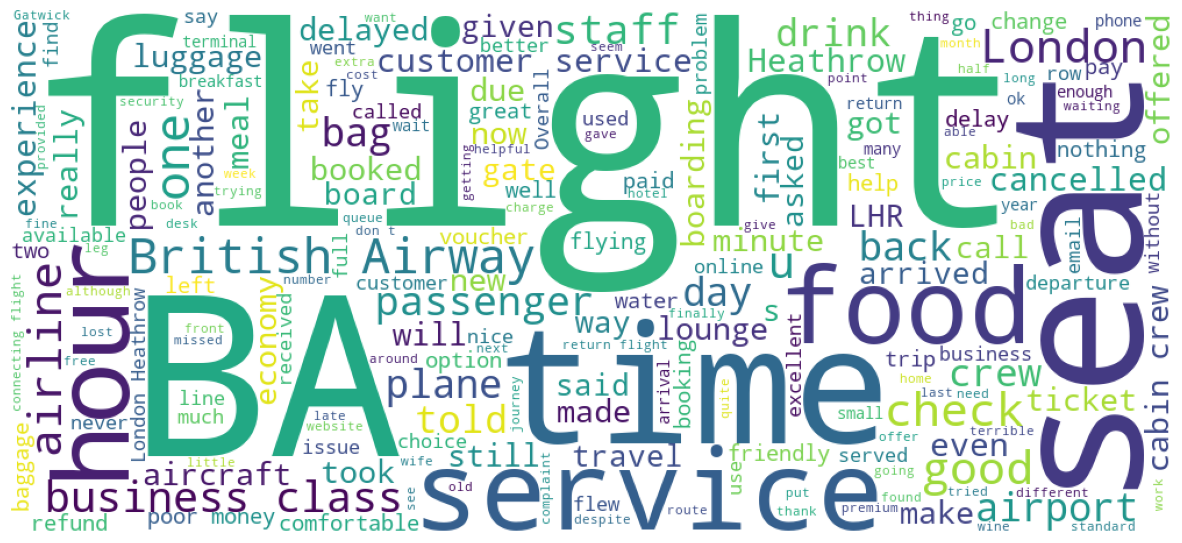

In [17]:
review_word = []

for i in df['reviews']:
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### observation:
- From the above wordcloud, it can be seen that the main topics involve customer reviews are flight, time, service, food and   seat. 


## Customer Satisfaction

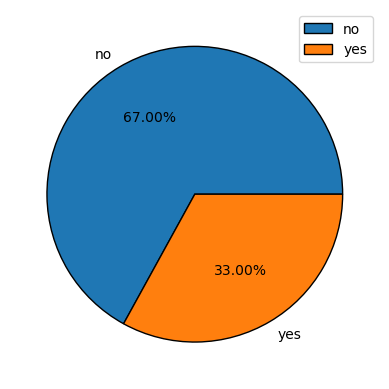

In [22]:
# Custom color palette
#custom_colors = ['#14AAF5', '#299438']  # Replace with your desired colors

# Grouping and pie chart
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels=soc['Recommended'], autopct='%.2f%%',shadow=False,
        wedgeprops={"edgecolor": "k"})
plt.legend()
plt.show()

## Observation:
- From the above pie chart, it is seen that almost 67 % of passengers are dissatisfied with British Airways services.
- Let's further breakdown the data to find out what make passengers dissatisfied :

# Analysis of British Airways Rating by Dissatisfied Passengers:

In [23]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,586.000000,579.000000,480.000000,328.000000,615.000000,189.000000,670.000000
mean,2.090444,2.430052,1.860417,2.192073,1.803252,1.481481,1.534328
std,1.098722,1.320531,1.073157,1.247504,1.170479,0.954232,0.835239
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Observation:
- From the above descriptive statistics, following keypoints cane be observed.
- Customer services like Seat Comfort, Cabin Staff Service, Inflight Entertainment have got < 3 out of 5 average rating from   passengers.
- Further, Customer services like Food & Beverages, Ground Service, Wifi & Connectivity, Value For Money have got < 2 out of 5 average rating from passengers.

In [24]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe(include=object)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,reviews
count,270,668,670,667,670,670,670
unique,50,4,4,487,62,1,670
top,A320,Couple Leisure,Economy Class,London to Malaga,June 2023,no,We have flown BA five times from western USA...
freq,76,221,411,7,30,670,1


# Analysis of Food Services Provided by British Airways

In [25]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

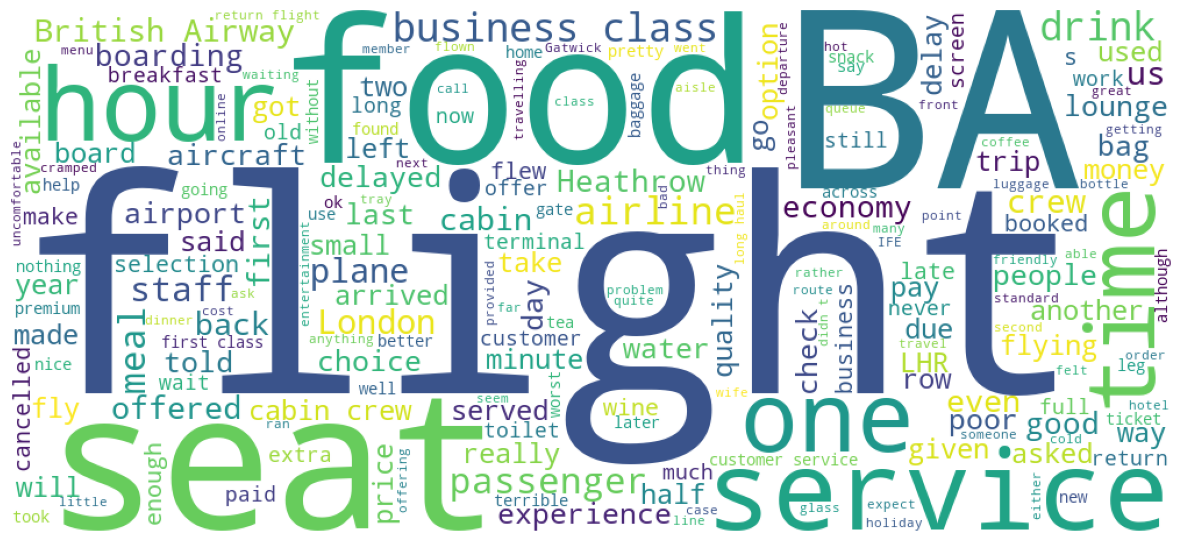

In [26]:
review_word = []

for i in data['reviews']:
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

## Observation:
- After analysing the test.csv file, got following insights:
- Time to deliver the order is too long
- For free catering just bottle of water and a packet of crisps
